# Forward modelling
In this tutorial, we will see how to use pyR2 API to do forward modelling.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys
sys.path.append((os.path.relpath('../src'))) # add here the relative path of the API folder

import numpy as np # numpy for electrode generation
from resipy import Project

API path =  /media/jkl/data/phd/tmp/resipy/src/resipy
ResIPy version =  3.2.0
cR2.exe found and up to date.
R3t.exe found and up to date.
cR3t.exe found and up to date.


In [2]:
k = Project(typ='R2') # create R2 object

Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


First we need to design some electrodes. We will use numpy functions for this.

In [3]:
elec = np.zeros((24,3))
elec[:,0] = np.arange(0, 24*0.5, 0.5) # with 0.5 m spacing and 24 electrodes
k.setElec(elec)
print(k.elec)

       x    y    z  remote  buried label
0    0.0  0.0  0.0   False   False     1
1    0.5  0.0  0.0   False   False     2
2    1.0  0.0  0.0   False   False     3
3    1.5  0.0  0.0   False   False     4
4    2.0  0.0  0.0   False   False     5
5    2.5  0.0  0.0   False   False     6
6    3.0  0.0  0.0   False   False     7
7    3.5  0.0  0.0   False   False     8
8    4.0  0.0  0.0   False   False     9
9    4.5  0.0  0.0   False   False    10
10   5.0  0.0  0.0   False   False    11
11   5.5  0.0  0.0   False   False    12
12   6.0  0.0  0.0   False   False    13
13   6.5  0.0  0.0   False   False    14
14   7.0  0.0  0.0   False   False    15
15   7.5  0.0  0.0   False   False    16
16   8.0  0.0  0.0   False   False    17
17   8.5  0.0  0.0   False   False    18
18   9.0  0.0  0.0   False   False    19
19   9.5  0.0  0.0   False   False    20
20  10.0  0.0  0.0   False   False    21
21  10.5  0.0  0.0   False   False    22
22  11.0  0.0  0.0   False   False    23
23  11.5  0.0  0

Now let's create a mesh.

Creating triangular mesh...

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
A survey needs to imported before a memory usage estimate can be made
done


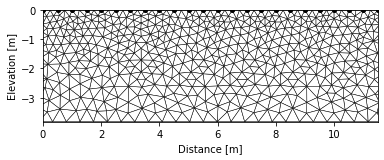

In [4]:
k.createMesh(typ='trian', show_output=False, res0=200) # let's create the mesh based on these electrodes position
k.showMesh()

Based on this mesh, we can defined regions and assign them conductivities. There is an interactive way to do it when working outside of the jupyter notebook in interactive mode or GUI. Here we will see the pure API based way to do it using `R2.addRegion()`.

In [5]:
help(k.addRegion) # to display the help of the method

Help on method addRegion in module resipy.Project:

addRegion(xz, res0=100, phase0=1, blocky=False, fixed=False, ax=None, iplot=False) method of resipy.Project.Project instance
    Add region according to a polyline defined by `xz` and assign it
    the starting resistivity `res0`.
    
    Parameters
    ----------
    xz : array
        Array with two columns for the x and y coordinates.
    res0 : float, optional
        Resistivity values of the defined area.
    phase0 : float, optional
        Read only if you choose the cR2 option. Phase value of the defined
        area in mrad
    blocky : bool, optional
        If `True` the boundary of the region will be blocky if inversion
        is block inversion.
    fixed : bool, optional
        If `True`, the inversion will keep the starting resistivity of this
        region.
    ax : matplotlib.axes.Axes
        If not `None`, the region will be plotted against this axes.
    iplot : bool, optional
        If `True` , the updated m

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


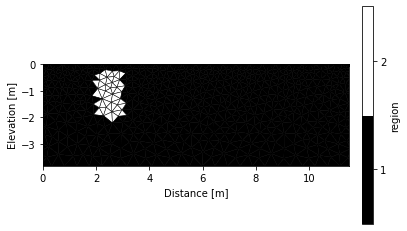

In [6]:
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 50, iplot=True)
# first specify the path of the region and then its resistivity value in Ohm.m

We then need to define the sequence that we will use. We can easily create a dipole-dipole sequence using `R2.createSequence()` or import one using `R2.importSequence()`.

In [7]:
help(k.createSequence) # don't hersitate to use the help to know more about each method

Help on method createSequence in module resipy.Project:

createSequence(params=[('dpdp1', 1, 8)], seqIdx=None, *kwargs) method of resipy.Project.Project instance
    Creates a forward modelling sequence, see examples below for usage.
    
    Parameters
    ----------
    params : list of tuple, optional
        Each tuple is the form (<array_name>, param1, param2, ...)
        Types of sequences available are : 'dpdp1','dpdp2','wenner_alpha',
        'wenner_beta', 'wenner_gamma', 'schlum1', 'schlum2', 'multigrad'.
    seqIdx: list of array like 
        Each entry in list contains electrode indices (not label and string)
        for a given electrode string which is to be sequenced. The advantage
        of a list means that sequences can be of different lengths. 
    Examples
    --------
    >>> k = R2()
    >>> k.setElec(np.c_[np.linspace(0,5.75, 24), np.zeros((24, 2))])
    >>> k.createMesh(typ='trian')
    >>> k.createSequence([('dpdp1', 1, 8), ('wenner_alpha', 1), ('wenner_alph

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [8]:
k.createSequence([('dpdp1', 1, 10)]) # create a dipole-dipole of diple spacing of 1 (=skip 0) with 10 levels
print(k.sequence) # the sequence is stored inside the R2 object

165 quadrupoles generated.
[[ 1  2  3  4]
 [ 2  3  4  5]
 [ 3  4  5  6]
 [ 4  5  6  7]
 [ 5  6  7  8]
 [ 6  7  8  9]
 [ 7  8  9 10]
 [ 8  9 10 11]
 [ 9 10 11 12]
 [10 11 12 13]
 [11 12 13 14]
 [12 13 14 15]
 [13 14 15 16]
 [14 15 16 17]
 [15 16 17 18]
 [16 17 18 19]
 [17 18 19 20]
 [18 19 20 21]
 [19 20 21 22]
 [20 21 22 23]
 [21 22 23 24]
 [ 1  2  4  5]
 [ 2  3  5  6]
 [ 3  4  6  7]
 [ 4  5  7  8]
 [ 5  6  8  9]
 [ 6  7  9 10]
 [ 7  8 10 11]
 [ 8  9 11 12]
 [ 9 10 12 13]
 [10 11 13 14]
 [11 12 14 15]
 [12 13 15 16]
 [13 14 16 17]
 [14 15 17 18]
 [15 16 18 19]
 [16 17 19 20]
 [17 18 20 21]
 [18 19 21 22]
 [19 20 22 23]
 [20 21 23 24]
 [ 1  2  5  6]
 [ 2  3  6  7]
 [ 3  4  7  8]
 [ 4  5  8  9]
 [ 5  6  9 10]
 [ 6  7 10 11]
 [ 7  8 11 12]
 [ 8  9 12 13]
 [ 9 10 13 14]
 [10 11 14 15]
 [11 12 15 16]
 [12 13 16 17]
 [13 14 17 18]
 [14 15 18 19]
 [15 16 19 20]
 [16 17 20 21]
 [17 18 21 22]
 [18 19 22 23]
 [19 20 23 24]
 [ 1  2  6  7]
 [ 2  3  7  8]
 [ 3  4  8  9]
 [ 4  5  9 10]
 [ 5  6 10 11

Then comes the forward modelling part itself. The forward modelling will run R2, cR2, ... in forward mode inside a `fwd` directory inside the working directory. The resulting apparent resistivity are then embeded inside a `Survey` object and directly available for inversion for instance.

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Writing .in file and mesh.dat... done!
Writing protocol.dat... done!
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 19 - 01 - 2021
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read:   165     Measurements rejected:     0

 >> Total Memory required is:          0.021 Gb
0/165 reciprocal measurements found.
0/165 reciprocal measurements found.
Forward modelling done.

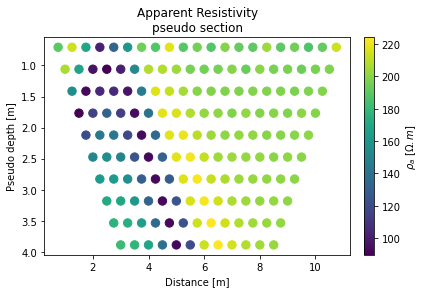

In [9]:
k.forward(noise=0.05, iplot=True) # forward modelling with 5 % noise added to the output

We can already see that the pseudo-section already show clearly the import on the region we defined. We can now invert these apparent resistivities. Inverting the forward models allow the user to see if the parameters of the surveys (the sequence and electrode spacing) were optimium to resolve the target. If needed he can change them and do the whole process again.

In [10]:
k.invert()

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Writing .in file and protocol.dat... All non fixed parameters reset to 100 Ohm.m and 0 mrad, as the survey to be inverted is from a forward model.
done!

--------------------- MAIN INVERSION ------------------


 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 19 - 01 - 2021
 >> My beautiful survey                                                             
 >> I n v e r s e   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from res0.dat                      
 >> R e g u l a r i s e d   T y p e <<
 >>   L i n e a r    F i l t e r    <<
 >> L o g - D a t a   I n v e r s i o n <<
 >> N o r m a l   R e g u l a r i s a t i o n <<
 >> D a t a   w e i g h t s   w i l l   b e  m o d i f i e d <<


 Processing dataset   1


 Measurements read:   165     Measurements rejected:     0
   Geometric mean of apparent 

ERROR: No sensitivity attribute found


`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


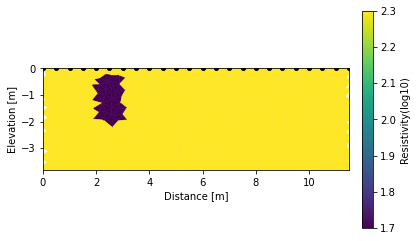

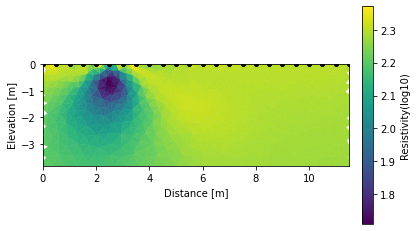

In [11]:
k.showResults(index=0) # show the initial model
k.showResults(index=1, sens=False) # show the inverted model

## In a nutshell

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


Working directory is: /media/jkl/data/phd/tmp/resipy/src/resipy
clearing dirname
Creating triangular mesh...Reading mesh.msh
Gmsh version == 3.x
reading node coordinates...
Determining element type...Triangle
Reading connection matrix...
ignoring 0 elements in the mesh file, as they are not required for R2/R3t
Finished reading .msh file
Done
A survey needs to imported before a memory usage estimate can be made
done
165 quadrupoles generated.
Writing .in file and mesh.dat... done!
Writing protocol.dat... done!
Running forward model... 

 >> R  2    R e s i s t i v i t y   I n v e r s i o n   v4.02 <<

 >> D a t e : 19 - 01 - 2021
 >> My beautiful survey                                                             
 >> F o r w a r d   S o l u t i o n   S e l e c t e d <<
 >> Determining storage needed for finite element conductance matrix
 >> Generating index array for finite element conductance matrix
 >> Reading start resistivity from resistivity.dat               

 Measurements read: 

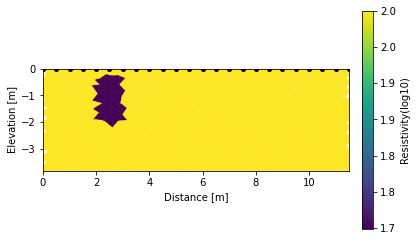

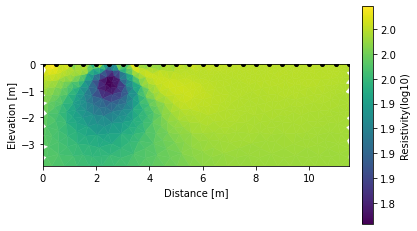

In [12]:
k = Project(typ='R2')

# defining electrode array
x = np.zeros((24, 3))
x[:,0] = np.arange(0, 24*0.5, 0.5)
k.setElec(elec)

# creating mesh
k.createMesh()

# add region
k.addRegion(np.array([[2,-0.3],[2,-2],[3,-2],[3,-0.3],[2,-0.3]]), 50)

# define sequence
k.createSequence([('dpdp1', 1, 10)])

# forward modelling
k.forward(noise=0.0)

# inverse modelling based on forward results
k.invert()

# show the initial and recovered section
k.showResults(index=0) # initial
k.showResults(index=1, sens=False) # recovered
